<a href="https://colab.research.google.com/github/eentartetekunst/NGS_bioinformatics/blob/main/HW1_Hisat2_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
! pip install -q condacolab

In [3]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:29
🔁 Restarting kernel...


In [43]:
!conda install -y -c bioconda samtools

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    htslib-1.16                |       h6bc39ce_0         2.3 MB  bioconda
    libdeflate-1.13            |       h166bdaf_0          79 KB  conda-forge
    samtools-1.16.1            |       h6899075_1         411 KB  bioconda
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  htslib             bioconda/linux-64::htslib-1.16-h6bc39ce_0 None
  libdeflate         conda-forge/linux-64::libdeflate-1.13-h166bdaf_0 None

The following packages will be UPDATED:

  samtools                                            1.

In [2]:
! sudo apt install bedtools 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 577 kB of archives.
After this operation, 2,040 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 bedtools amd64 2.26.0+dfsg-5 [577 kB]
Fetched 577 kB in 1s (540 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-p

In [3]:
! conda install -c bioconda regtools 

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - regtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libzlib-1.2.13             |       h166bdaf_4          64 KB  conda-forge
    regtools-0.6.1             |       hd03093a_0         5.0 MB  bioconda
    zlib-1.2.13                |       h166bdaf_4          92 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  regtools           bioconda/linux-64::regtools-0.6.1-hd03093a_0 None
  zlib               conda-forge/linux-64::zlib-1.2.13-h166bdaf_4 None

The following packages will be UPDATED:

  

## import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! mkdir reads

In [11]:
! mv *.fq.gz content reads

mv: cannot stat 'content': No such file or directory


In [12]:
! ls reads

B14.5.fq.gz  B17.5.fq.gz  C15.5.fq.gz  C20.fq.gz
B15.5.fq.gz  B20.fq.gz	  C17.5.fq.gz  C34.fq.gz


## 2) install hisat2

In [13]:
! sudo apt-get update

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,188 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,32

In [14]:
! sudo apt-get -y install hisat2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  hisat2
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 1,278 kB of archives.
After this operation, 5,144 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 hisat2 amd64 2.1.0-1 [1,278 kB]
Fetched 1,278 kB in 1s (1,988 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-pre

## 3) download chr19 sequence and its annotation

In [15]:
! wget http://ftp.ensembl.org/pub/release-107/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz #chr19 sequence
! wget http://ftp.ensembl.org/pub/release-107/gtf/mus_musculus/Mus_musculus.GRCm39.107.gtf.gz # annotation
! gzip -d Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
! gzip -d Mus_musculus.GRCm39.107.gtf.gz

--2022-10-16 11:01:41--  http://ftp.ensembl.org/pub/release-107/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17732438 (17M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.dna.chromosome.19.fa.gz’

Mus_musculus.GRCm39 100%[===================>]  16.91M   458KB/s    in 38s     

2022-10-16 11:02:20 (453 KB/s) - ‘Mus_musculus.GRCm39.dna.chromosome.19.fa.gz’ saved [17732438/17732438]

--2022-10-16 11:02:20--  http://ftp.ensembl.org/pub/release-107/gtf/mus_musculus/Mus_musculus.GRCm39.107.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31861821 (30M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.107.gtf.gz’


## 4) select chr 19 from the annotation

In [16]:
! touch chr19-annotation 
! grep -P '^19\t' /content/Mus_musculus.GRCm39.107.gtf > chr19-annotation 

In [17]:
!ls -lh

total 918M
-rw-r--r-- 1 root root  27M Oct 16 11:03 chr19-annotation
-rw-r--r-- 1 root root  16K Oct 16 10:52 condacolab_install.log
-rw-r--r-- 1 root root 831M Jun  4 09:40 Mus_musculus.GRCm39.107.gtf
-rw-r--r-- 1 root root  60M Jun  4 08:49 Mus_musculus.GRCm39.dna.chromosome.19.fa
drwxr-xr-x 2 root root 4.0K Oct 16 11:01 reads
drwxr-xr-x 1 root root 4.0K Oct  7 13:35 sample_data


In [18]:
! head -n2 chr19-annotation 

19	ensembl	gene	56265950	56266077	.	-	.	gene_id "ENSMUSG00000077223"; gene_version "3"; gene_name "Gm22271"; gene_source "ensembl"; gene_biotype "snoRNA";
19	ensembl	transcript	56265950	56266077	.	-	.	gene_id "ENSMUSG00000077223"; gene_version "3"; transcript_id "ENSMUST00000104035"; transcript_version "3"; gene_name "Gm22271"; gene_source "ensembl"; gene_biotype "snoRNA"; transcript_name "Gm22271-201"; transcript_source "ensembl"; transcript_biotype "snoRNA"; tag "basic"; transcript_support_level "NA (assigned to previous version 1)";


## 5) build index for chr 19

In [ ]:
# ! hisat2-build Mus_musculus.GRCm39.dna.chromosome.19.fa base-index

In [84]:
# run after running extract ss and exons
! hisat2-build --ss chr19.ss --exon chr19.exons Mus_musculus.GRCm39.dna.chromosome.19.fa base-index

Settings:
  Output files: "base-index.*.ht2"
  Line rate: 7 (line is 128 bytes)
  Lines per side: 1 (side is 128 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  Mus_musculus.GRCm39.dna.chromosome.19.fa
Reading reference sizes
  Time reading reference sizes: 00:00:01
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
  Time to read SNPs and splice sites: 00:00:00
Generation 0 (58229592 -> 58229592 nodes, 0 ranks)
COUNTED NEW NODES: 0
COUNTED TEMP NODES: 0
RESIZED NODES: 0
RESIZED NODES: 0
MADE NEW NODES: 0
Generation 1 (582388

## map all reads on chr19 sequence (no trimming, known splice sites)
use --known-splicesite-infile:
With this mode, you can provide a list of known splice sites, which HISAT makes use of to align reads with small anchors.
You can create such a list using python extract_splice_sites.py genes.gtf > splicesites.txt, where extract_splice_sites.py is included in the HISAT package, genes.gtf is a gene annotation file, and splicesites.txt is a list of splice sites with which you provide HISAT in this mode

## install extract_splice_sites.py and extract_exons.py

In [22]:
! wget https://raw.githubusercontent.com/dekoning-lab/ezmap/master/tools/HISAT2/hisat2-2.0.5-Linux/extract_splice_sites.py
! chmod a+x extract_splice_sites.py
! ./extract_splice_sites.py

--2022-10-16 11:06:05--  https://raw.githubusercontent.com/dekoning-lab/ezmap/master/tools/HISAT2/hisat2-2.0.5-Linux/extract_splice_sites.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5021 (4.9K) [text/plain]
Saving to: ‘extract_splice_sites.py’

extract_splice_site 100%[===================>]   4.90K  --.-KB/s    in 0s      

2022-10-16 11:06:05 (57.6 MB/s) - ‘extract_splice_sites.py’ saved [5021/5021]

usage: extract_splice_sites.py [-h] [-v] [gtf_file]

Extract splice junctions from a GTF file

positional arguments:
  gtf_file       input GTF file (use "-" for stdin)

optional arguments:
  -h, --help     show this help message and exit
  -v, --verbose  also print some statistics to stderr


In [23]:
! wget https://raw.githubusercontent.com/dekoning-lab/ezmap/master/tools/HISAT2/hisat2-2.0.5-Linux/extract_exons.py
! chmod a+x extract_exons.py
! ./extract_exons.py

--2022-10-16 11:06:11--  https://raw.githubusercontent.com/dekoning-lab/ezmap/master/tools/HISAT2/hisat2-2.0.5-Linux/extract_exons.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5597 (5.5K) [text/plain]
Saving to: ‘extract_exons.py’

extract_exons.py    100%[===================>]   5.47K  --.-KB/s    in 0s      

2022-10-16 11:06:11 (62.8 MB/s) - ‘extract_exons.py’ saved [5597/5597]

usage: extract_exons.py [-h] [-v] [gtf_file]

Extract exons from a GTF file

positional arguments:
  gtf_file       input GTF file (use "-" for stdin)

optional arguments:
  -h, --help     show this help message and exit
  -v, --verbose  also print some statistics to stderr


## extract splice sites and exon's locations  from the annotation

In [83]:
! ./extract_splice_sites.py chr19-annotation > chr19.ss # extract sites from the annotation
! ! ./extract_exons.py chr19-annotation > chr19.exons 

In [25]:
! head -n2 chr19.ss 

19	3103277	3109879	-
19	3109990	3119366	-


In [26]:
! head -n2 chr19.exons

19	3103070	3103277	-
19	3109879	3109990	-


## map reads on chr19 with no trimming, with known splice sites

---



## 6) Прокартируйте все fq файлы (начните с одного) на 19ую хромосому при помощи hisat2 не допуская обрезания ридов и сообщив hisat2 координаты сайтов сплайсинга 

In [85]:
%%shell 
# reads_list='B20'
reads_list='C14.5 B34 B14.5 C15.5 C17.5 B17.5 C34 B20 B15.5 C20' 
index='base-index'
fq='/content/reads'

for i in ${reads_list}
do hisat2 --summary-file ${i}.log --no-softclip --no-unal -x ${index} -U ${fq}/${i}.fq.gz | samtools view -Sb - > ${i}.bam 
done

599777 reads; of these:
  599777 (100.00%) were unpaired; of these:
    51160 (8.53%) aligned 0 times
    538522 (89.79%) aligned exactly 1 time
    10095 (1.68%) aligned >1 times
91.47% overall alignment rate


## 7) Выберите случайно один образец

## 8)Сколько ридов картируется в регион 19:12485000-12490000 в этом образце? 

In [35]:
! samtools sort -o B20.s.bam B20.bam #coordinate sorting

In [36]:
! samtools index B20.s.bam # Generate BAI-format index for BAM files

In [37]:
! samtools view B20.s.bam 19:12485000-12490000 

HISEQ:129:C2LRCACXX:1:2108:20530:65021	16	19	12486735	60	101M	*	0	0	TTTAAAATCACCCAATAGACTGACTTGCCAGCGTGCCTGTAAGGAGTTATCTAGAATCAGTTAACTAAGGTAGGAATACCCACCCTAACCTTGGGCAGCAC	:CCDEEDB@@DCDEECDCCDEDCBC@DDFFHHHIIIIIIIIIIIIIIIIIFIIIIIIIIIIIIIIIIIIIIIIIHE<?IGF?IIIIGGHHHHHFFFFFCCC	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:101	YT:Z:UU	NH:i:1
HISEQ:129:C2LRCACXX:1:1204:10203:87648	16	19	12487196	60	101M	*	0	0	TGTATTGACATCTTAAACTATTTCAAATATACCCCAACCTCAGCTAATCTGGGTTACAAACCCCCTAAAATTCAAATAACATCTCATTTGAATGTCCAGAC	@C:EEEDEDDDCDEEFCDDDDDDEFFFDDBBDDFFECHHHIJJJJJJJJJJJJIIJJIHFIJJJJIJJJJIIJJJJIIJJIHHIJJJJHHHHHFFFFFCCC	AS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:5C95	YT:Z:UU	NH:i:1
HISEQ:129:C2LRCACXX:1:2104:14666:2583	16	19	12487196	60	101M	*	0	0	TGTATTGACATCTTAAACTATTTCAAATATACCCCAACCTCAGCTAATCTGGGTTACAAACCCCCTAAAATTCAAATAACATCTCATTTGAATGTCCAGAC	CDEEEEDEDDDDDEEDDDDDDDEEFFFEDBDDDFFEHHHHJJJJJJJIJJJJJJJJIHHFJJJJIJJJJIIHIJJJJJHIIHJIJJJJHHHHHFFFFFCCC	AS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:5C9

## 9) Сколько из них картируются только в одно место генома?


In [44]:
! samtools view B20.s.bam 19:12485000-12490000 -d NH:1 -c  
#  риды, которые картировлаись на одно место в данном участке 
# -c Instead of printing the alignments, only print the total number. 

3


In [45]:
! samtools view B20.s.bam 19:12485000-12490000  -d NH:1 

HISEQ:129:C2LRCACXX:1:2108:20530:65021	16	19	12486735	60	101M	*	0	0	TTTAAAATCACCCAATAGACTGACTTGCCAGCGTGCCTGTAAGGAGTTATCTAGAATCAGTTAACTAAGGTAGGAATACCCACCCTAACCTTGGGCAGCAC	:CCDEEDB@@DCDEECDCCDEDCBC@DDFFHHHIIIIIIIIIIIIIIIIIFIIIIIIIIIIIIIIIIIIIIIIIHE<?IGF?IIIIGGHHHHHFFFFFCCC	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:101	YT:Z:UU	NH:i:1
HISEQ:129:C2LRCACXX:1:1204:10203:87648	16	19	12487196	60	101M	*	0	0	TGTATTGACATCTTAAACTATTTCAAATATACCCCAACCTCAGCTAATCTGGGTTACAAACCCCCTAAAATTCAAATAACATCTCATTTGAATGTCCAGAC	@C:EEEDEDDDCDEEFCDDDDDDEFFFDDBBDDFFECHHHIJJJJJJJJJJJJIIJJIHFIJJJJIJJJJIIJJJJIIJJIHHIJJJJHHHHHFFFFFCCC	AS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:5C95	YT:Z:UU	NH:i:1
HISEQ:129:C2LRCACXX:1:2104:14666:2583	16	19	12487196	60	101M	*	0	0	TGTATTGACATCTTAAACTATTTCAAATATACCCCAACCTCAGCTAATCTGGGTTACAAACCCCCTAAAATTCAAATAACATCTCATTTGAATGTCCAGAC	CDEEEEDEDDDDDEEDDDDDDDEEFFFEDBDDDFFEHHHHJJJJJJJIJJJJJJJJIHHFJJJJIJJJJIIHIJJJJJHIIHJIJJJJHHHHHFFFFFCCC	AS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:5C9

## 10) Сколько ридов картровалось без замен? Сколько с 1, 2 и т. д. заменами?

In [46]:
! samtools view B20.s.bam 19:12485000-12490000 -d NM:1 -c # с 1 заменой 

2


In [47]:
! samtools view B20.s.bam 19:12485000-12490000  -d NM:2 -c # с 2 заменами

0


Риды, картировавшиеся на всю хромосому с i заменами:

In [49]:
%%shell
list_my_i='1 2 3 4 5 6 7 8 9 10 11 12'
for i in ${list_my_i}
do samtools view B20.s.bam  -d NM:${i} -c # с i заменами -- картирование на всю хромасому
done

105165
26533
11920
4082
2145
1247
558
251
57
28
0
0


## 11) Сколько ридов картировалось на экзон-экзонные границы? 

https://regtools.readthedocs.io/en/latest/commands/junctions-extract/ 

The junctions extract command can be used to extract exon-exon junctions from an RNAseq BAM file. The output is a BED file in the BED12 format

In [95]:
! samtools index B20.s.bam 

In [96]:
# /content/B14.5.bam.bai path to coordinate-sorted file
! regtools junctions extract -o B20.bed -s XS B20.s.bam 


Program:	regtools
Version:	0.5.2
Minimum junction anchor length: 8
Minimum intron length: 70
Maximum intron length: 500000
Alignment: B20.s.bam
Output file: B20.bed



In [97]:
! head B20.bed

19	3133283	3137373	JUNC00000001	1	+	3133283	3137373	255,0,0	2	58,43	0,4047
19	3277734	3277911	JUNC00000002	1	+	3277734	3277911	255,0,0	2	84,17	0,160
19	3311559	3312030	JUNC00000003	2	-	3311559	3312030	255,0,0	2	76,56	0,415
19	3312071	3314887	JUNC00000004	2	-	3312071	3314887	255,0,0	2	73,77	0,2739
19	3315609	3316433	JUNC00000005	2	-	3315609	3316433	255,0,0	2	56,98	0,726
19	3316371	3317302	JUNC00000006	3	-	3316371	3317302	255,0,0	2	88,61	0,870
19	3317250	3318324	JUNC00000007	2	-	3317250	3318324	255,0,0	2	86,27	0,1047
19	3318371	3318756	JUNC00000008	5	-	3318371	3318756	255,0,0	2	45,97	0,288
19	3318772	3321588	JUNC00000009	2	-	3318772	3321588	255,0,0	2	70,63	0,2753
19	3321609	3322913	JUNC00000010	2	-	3321609	3322913	255,0,0	2	91,26	0,1278


In [98]:
! regtools junctions annotate -o B20.exonexon.reads B20.bed Mus_musculus.GRCm39.dna.chromosome.19.fa chr19-annotation 

Streaming output truncated to the last 5000 lines.
position = 19:33534579-33534580
position = 19:33535663-33535664
position = 19:33534579-33534580
position = 19:33560445-33560446
position = 19:33535737-33535738
position = 19:33557863-33557864
position = 19:33537056-33537057
position = 19:33556760-33556761
position = 19:33556899-33556900
position = 19:33557863-33557864
position = 19:33557975-33557976
position = 19:33559451-33559452
position = 19:33559553-33559554
position = 19:33600800-33600801
position = 19:33559652-33559653
position = 19:33560445-33560446
position = 19:33560565-33560566
position = 19:33562268-33562269
position = 19:33562376-33562377
position = 19:33565599-33565600
position = 19:33700302-33700303
position = 19:33724237-33724238
position = 19:33724349-33724350
position = 19:33725833-33725834
position = 19:33800660-33800661
position = 19:33802309-33802310
position = 19:33929936-33929937
position = 19:33933109-33933110
position = 19:34170032-34170033
position = 19:3419758

In [99]:
! head B20.exonexon.reads 
# score - The number of reads supporting the junction. [integer]

chrom	start	end	name	score	strand	splice_site	acceptors_skipped	exons_skipped	donors_skipped	anchor	known_donor	known_acceptor	known_junction	gene_names	gene_ids	transcripts
19	3133341	3137331	JUNC00000001	1	+	GT-AG	0	0	0	N	0	0	0	NA	NA	NA
19	3277818	3277895	JUNC00000002	1	+	GT-AG	0	0	0	N	0	0	0	NA	NA	NA
19	3311635	3311975	JUNC00000003	2	-	GT-AG	0	0	0	DA	1	1	1	Ighmbp2	ENSMUSG00000024831	ENSMUST00000025751,ENSMUST00000119292
19	3312144	3314811	JUNC00000004	2	-	GT-AG	0	0	0	DA	1	1	1	Ighmbp2	ENSMUSG00000024831	ENSMUST00000025751,ENSMUST00000119292
19	3315665	3316336	JUNC00000005	2	-	GT-AG	0	0	0	DA	1	1	1	Ighmbp2	ENSMUSG00000024831	ENSMUST00000025751,ENSMUST00000119292,ENSMUST00000143079,ENSMUST00000154537
19	3316459	3317242	JUNC00000006	3	-	GT-AG	0	0	0	DA	1	1	1	Ighmbp2	ENSMUSG00000024831	ENSMUST00000025751,ENSMUST00000119292,ENSMUST00000143079,ENSMUST00000154537
19	3317336	3318298	JUNC00000007	2	-	GT-AG	1	0	0	DA	1	1	1	Ighmbp2	ENSMUSG00000024831	ENSMUST00000025751,ENSMUST00000119292,ENSMUST000

In [101]:
! cat B20.exonexon.reads | awk '($2 <= 12490000 && $3 >= 12485000)' 
# риды из данного интервала, в которых есть экзон-экзонная граница
# таких ридов нет, однако, если не подавать сайтты сплайсинга при картировании, их 4:

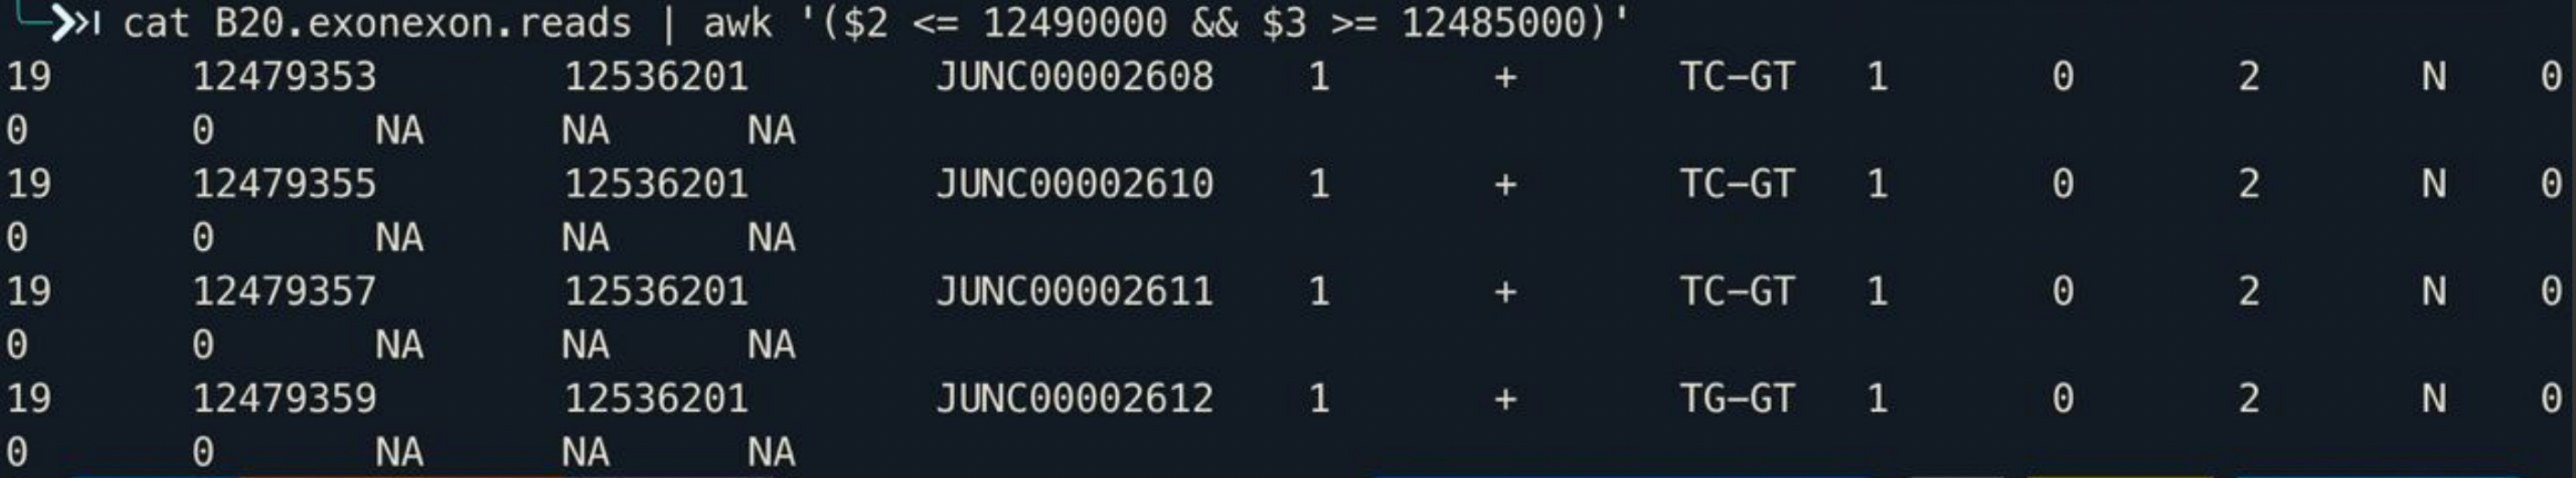

## 12) Перечислите координаты всех интронов в данном интервале подтверждённых хотя бы одним ридом в формате: chr:from-to coverage

In [94]:
! samtools view B20.s.bam -b 19:12485000-12490000 > targetB20.s.bam # choose target region

In [93]:
! bedtools bamtobed -i targetB20.s.bam > targetB20.s.bed 

Failed to open BAM file targetB20.s.bam


In [75]:
! head targetB20.s.bed # reads in target region 

19	12486734	12486835	HISEQ:129:C2LRCACXX:1:2108:20530:65021	60	-
19	12487195	12487296	HISEQ:129:C2LRCACXX:1:1204:10203:87648	60	-
19	12487195	12487296	HISEQ:129:C2LRCACXX:1:2104:14666:2583	60	-


### bedtools complement -i exons.bed -g genome.txt > non-exonic.bed -- to get intron coordinates 

In [76]:
! head /content/chr19.exons

19	3103070	3103277	-
19	3109879	3109990	-
19	3115710	3118148	-
19	3119366	3119439	-
19	3122687	3122952	-
19	3125713	3125884	-
19	3184644	3184958	+
19	3186983	3187089	-
19	3192759	3193064	+
19	3195867	3196264	-


Если вычести из всех ридов те, что попадают на экзоны, мы получим покрытие интронов:

In [77]:
! bedtools subtract -a targetB20.s.bed -b chr19.exons 

19	12486734	12486835	HISEQ:129:C2LRCACXX:1:2108:20530:65021	60	-
19	12487195	12487296	HISEQ:129:C2LRCACXX:1:1204:10203:87648	60	-
19	12487195	12487296	HISEQ:129:C2LRCACXX:1:2104:14666:2583	60	-


Координаты интронных ридов:

In [78]:
! bedtools subtract -a targetB20.s.bed -b chr19.exons  > introns.bed 
! awk -F"\t" '$5 > 0 { print $2"\t"$3 }' introns.bed 
# retrieve introns in the region, covered by at least one read 
# $5 > 0 stands for coverage score

12486734	12486835
12487195	12487296
12487195	12487296
